<a href="https://colab.research.google.com/github/franklinthony/superv-unsuperv-ai/blob/main/superv-unsuperv-ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Desenvolvimento de métodos supervisionados e não supervisionados**



---

Foram desenvolvidas, neste notebook, como segunda avaliação da disciplina _Introdução à Inteligência Artificial_:

* 2 aplicações envolvendo aprendizagem supervisionada. Como base de dados, foi utilizada a [HCV Data Set](https://archive.ics.uci.edu/ml/datasets/HCV+data#), que consiste na classificação de vinhos em três classes existentes

* 2 aplicações envolvendo aprendizagem não supervisionada. Como base de dados, foi utilizada a [Wine Data Set](https://archive.ics.uci.edu/ml/datasets/wine), que trata de pacientes com hepatice C, fibrose ou cirrose, e que podem ser classificados como doadores ou não doadores

Por fim, foram mostrados os resultados (através de diferentes métricas) para cada algoritmo, bem como breves discussões acerca dos mesmos

## **Aprendizagem supervisionada** 
---
As duas abordagens escolhidas foram _Multilayer Perceptron_ e _Random Forest_. Primeiramenta, seguiremos para a realização do pré-processamento da base de dados, seguindo para a aplicação dos modelos mencionados

### **Pré-processamento dos dados**
---


Vamos importar a biblioteca `pandas`, para importar a base de dados e realizar o pré-processamento da mesma

In [ ]:
import pandas as pd

Relizando o upload do arquivo `.csv`

In [ ]:
# Carregamento da base de dados
hcv_dataset = pd.read_csv("https://raw.githubusercontent.com/franklinthony/dataset/master/hcv.csv", sep = ',')
hcv_dataset

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,611,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,613,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,614,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


Podemos notar que a base é composta por 13 atributos previsores e a classe. Precisamos, antes de tudo, remover a coluna **Unnamed: 0** que trata do índice das instâncias, o que não é relevante para o processamento do nosso modelo. Para isso, vamos utilizar o método `pop`

In [ ]:
hcv_dataset.pop('Unnamed: 0')

0        1
1        2
2        3
3        4
4        5
      ... 
610    611
611    612
612    613
613    614
614    615
Name: Unnamed: 0, Length: 615, dtype: int64

Agora, vamos verificar se há alguma ocorrência de valores nulos

In [ ]:
# Verificação de valores nulos
pd.isnull(hcv_dataset).sum()

Category     0
Age          0
Sex          0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
dtype: int64

Podemos notar que a base possui valores nulos em sua composição. Em seguida, vamos remover as instâncias que possuem atributos nulos

In [ ]:
# Retirando instâncias com valores nulos em alguma coluna
hcv_dataset = hcv_dataset.dropna(axis = 0)
pd.isnull(hcv_dataset).sum()

Category    0
Age         0
Sex         0
ALB         0
ALP         0
ALT         0
AST         0
BIL         0
CHE         0
CHOL        0
CREA        0
GGT         0
PROT        0
dtype: int64

Visualizando novamente a base de dados

In [ ]:
hcv_dataset

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,3=Cirrhosis,58,f,34.0,46.4,15.0,150.0,8.0,6.26,3.98,56.0,49.7,80.6
609,3=Cirrhosis,59,f,39.0,51.3,19.6,285.8,40.0,5.77,4.51,136.1,101.1,70.5
610,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3


Podemos notar que houve uma redução no número de instâncias: de 615 para 589, isto é, 26 instâncias com algum atributo nulo foram removidas

Vamos retirar as instâncias correspondentes à **0s=suspect Blood Donor** e atribuir à uma nova variável, uma vez que as mesmas serão usadas para validar o nosso modelo

In [ ]:
hcv_dataset_suspect = hcv_dataset
hcv_dataset_suspect = hcv_dataset[hcv_dataset['Category'] == '0s=suspect Blood Donor']
hcv_dataset = hcv_dataset[hcv_dataset['Category'] != '0s=suspect Blood Donor']
hcv_dataset_suspect

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
533,0s=suspect Blood Donor,47,m,22.5,124.0,79.5,46.7,2.3,6.83,4.30,170.0,345.6,58.6
534,0s=suspect Blood Donor,48,m,24.9,116.9,49.2,24.3,4.9,3.44,5.25,29.0,83.0,47.8
535,0s=suspect Blood Donor,49,m,21.6,42.2,9.5,10.6,2.4,3.75,3.01,64.0,38.9,44.8
536,0s=suspect Blood Donor,55,m,47.3,106.0,208.8,130.6,0.8,14.80,8.08,76.0,71.6,78.3
537,0s=suspect Blood Donor,71,m,14.9,69.8,19.7,95.2,9.8,13.30,2.61,9.0,7.6,47.0
538,0s=suspect Blood Donor,74,m,20.3,84.0,22.8,43.0,5.7,4.91,3.19,52.0,218.3,47.8
539,0s=suspect Blood Donor,59,f,19.3,208.2,325.3,146.6,6.9,5.33,4.72,32.0,295.6,53.1


In [ ]:
hcv_dataset

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,3=Cirrhosis,58,f,34.0,46.4,15.0,150.0,8.0,6.26,3.98,56.0,49.7,80.6
609,3=Cirrhosis,59,f,39.0,51.3,19.6,285.8,40.0,5.77,4.51,136.1,101.1,70.5
610,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3


Precisamos, agora, atribuir "Não doador" para as instâncias **1=Hepatitis**, **2=Fibrosis** e **3=Cirrhosis**, e atribuir "Doador" para a instância **0=Blood Donor**. Para facilitar, vamos atribuir 0 para "Não doador" e 1 para "Doador"

Agora, iremos converter os atributos categóricas **Category** e **Sex** em numéricos. Para isso, usaremos a função `LabelEncoder`

In [ ]:
from sklearn.preprocessing import LabelEncoder

Convertendo os atributos categóricos em numéricos

In [ ]:
to_number = LabelEncoder()
# Transformando os dados categorizados da coluna 'Category' e 'Sex' em dados numéricos
hcv_dataset['Category'] = to_number.fit_transform(hcv_dataset['Category'] == '0=Blood Donor')
hcv_dataset['Sex'] = to_number.fit_transform(hcv_dataset['Sex'])
hcv_dataset

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,1,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,1,32,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,1,32,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,1,32,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,0,58,0,34.0,46.4,15.0,150.0,8.0,6.26,3.98,56.0,49.7,80.6
609,0,59,0,39.0,51.3,19.6,285.8,40.0,5.77,4.51,136.1,101.1,70.5
610,0,62,0,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,0,64,0,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3


Pronto! Agora, podemos notar que as instâncias com **Category** 0 correspondem aos não doadores e as instâncias com **Category** 1 correspondem aos doadores. Vamos verificar o balanceamento entre as classes

In [ ]:
hcv_dataset.groupby('Category').count()

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
Category,,,,,,,,,,,,
0,56,56,56,56,56,56,56,56,56,56,56,56
1,526,526,526,526,526,526,526,526,526,526,526,526


Podemos notar que a classe _doador_ possui um número de instâncias muito maior do que a classe _não doador_. Nesse caso, precisamos reduzir as instâncias _doador_, até que tenhamos um equilíbrio entre as classes

In [ ]:
hcv_dataset.head(470)

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,1,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,1,32,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,1,32,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,1,32,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,1,52,0,41.3,77.4,16.6,22.2,5.0,7.57,7.80,66.0,10.8,70.0
472,1,52,0,38.2,70.3,19.5,17.5,2.7,10.02,6.17,65.0,35.5,71.1
473,1,53,0,42.4,55.0,20.9,42.4,7.7,6.60,4.26,67.0,14.2,70.9
474,1,53,0,39.0,76.0,25.9,20.7,2.8,11.11,6.38,66.0,50.1,70.8


Retirando as primeiras 470 instâncias da classe _doador_

In [ ]:
hcv_dataset.drop(hcv_dataset.head(470).index, inplace = True) 
hcv_dataset

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
476,1,53,0,43.7,84.3,18.8,18.6,8.5,10.22,6.65,56.0,16.5,76.9
477,1,53,0,43.5,61.7,16.9,20.3,7.0,7.19,6.97,74.0,12.3,69.2
478,1,53,0,41.1,91.7,13.8,19.6,3.4,7.87,5.48,72.0,77.3,77.3
479,1,53,0,38.0,84.7,23.5,19.8,10.8,7.30,4.82,62.0,11.4,68.5
480,1,53,0,47.4,66.9,24.3,32.6,14.9,10.51,6.03,81.0,25.2,75.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,0,58,0,34.0,46.4,15.0,150.0,8.0,6.26,3.98,56.0,49.7,80.6
609,0,59,0,39.0,51.3,19.6,285.8,40.0,5.77,4.51,136.1,101.1,70.5
610,0,62,0,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,0,64,0,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3


In [ ]:
hcv_dataset.groupby('Category').count()

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
Category,,,,,,,,,,,,
0,56,56,56,56,56,56,56,56,56,56,56,56
1,56,56,56,56,56,56,56,56,56,56,56,56


Verificando informações estatísticas (como valores máximo e mínimo, quartis, média e desvio padrão) sobre o dataset

In [ ]:
hcv_dataset.describe()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000
mean,0.500000,53.250000,0.357143,39.249107,68.005357,18.551786,61.181250,20.750000,7.431161,5.221786,86.893750,67.097321,71.141071
std,0.502247,10.029237,0.481311,6.349860,43.974798,12.659861,63.424673,36.273466,2.843921,1.342236,112.075263,100.135306,6.406606
min,0.000000,23.000000,0.000000,23.000000,11.300000,0.900000,12.200000,2.000000,1.420000,1.430000,40.000000,7.200000,51.000000
25%,0.000000,50.000000,0.000000,35.700000,40.250000,9.300000,22.625000,5.800000,6.312500,4.215000,61.000000,16.275000,68.500000
50%,0.500000,56.000000,0.000000,40.000000,64.450000,16.000000,32.200000,8.900000,7.525000,5.100000,66.950000,31.600000,71.400000
75%,1.000000,59.000000,1.000000,43.425000,84.400000,24.425000,75.175000,17.000000,9.260000,6.065000,74.325000,70.250000,75.250000
max,1.000000,74.000000,1.000000,52.400000,416.600000,67.100000,324.000000,209.000000,16.410000,9.670000,1079.100000,650.900000,86.000000


Podemos notar, dentre todos os atributos previsores, que a maioria possui média e desvio padrão muito distantes entre si, o que pode caracterizar a presença de _outliers_

Vamos verificar a correlação entre os atributos, isto é, o quão eles estão relacionados

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sn

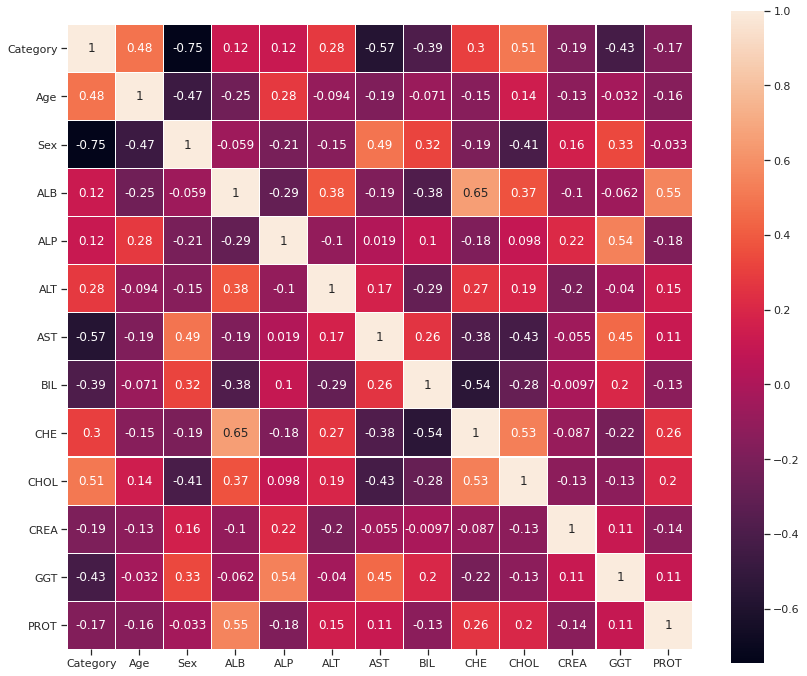

In [ ]:
sn.set(style='ticks', color_codes=True)
plt.figure(figsize=(14, 12))
sn.heatmap(hcv_dataset.corr(), 
            linewidths=0.1, 
            square=True, 
            linecolor='white', 
            annot=True)
plt.show()

Vamos verificar a ocorrência de possíveis _outliers_, isto é, dados que se distanciam drasticamente dos demais dados da amostra. Para isso, iremos plotar um _boxplot_

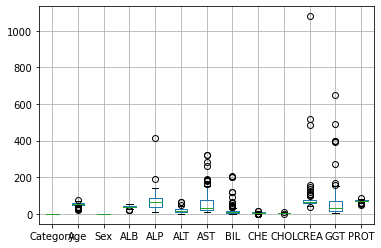

In [ ]:
hcv_dataset.boxplot()

Após uma verificação em toda a base de dados, foi constatado a existência de vários _outliers_ em vários atributos, o que pode comprometer os resultados obtidos através do modelo

Agora, iremos realizar a normalização dos atributos da base de dados, visando o contorno de possíveis problemas existentes pelos _outliers_. Vamos visualizar novamente o nosso dataset

In [ ]:
hcv_dataset

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
476,1,53,0,43.7,84.3,18.8,18.6,8.5,10.22,6.65,56.0,16.5,76.9
477,1,53,0,43.5,61.7,16.9,20.3,7.0,7.19,6.97,74.0,12.3,69.2
478,1,53,0,41.1,91.7,13.8,19.6,3.4,7.87,5.48,72.0,77.3,77.3
479,1,53,0,38.0,84.7,23.5,19.8,10.8,7.30,4.82,62.0,11.4,68.5
480,1,53,0,47.4,66.9,24.3,32.6,14.9,10.51,6.03,81.0,25.2,75.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,0,58,0,34.0,46.4,15.0,150.0,8.0,6.26,3.98,56.0,49.7,80.6
609,0,59,0,39.0,51.3,19.6,285.8,40.0,5.77,4.51,136.1,101.1,70.5
610,0,62,0,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,0,64,0,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3


Como os atributos estão em escalas bem próximas, vamos normalizar toda a base de dados

Vamos utilizar o método `StandardScaler`, que leva em consideração a média e o desvio padrão dos atributos

In [ ]:
# Armazenando os valores da média e do desvio padrão
colunas_mean = hcv_dataset.mean()
colunas_std = hcv_dataset.std()
# Criação da base de dados normalizada
hcv_dataset_norm = (hcv_dataset - colunas_mean) / colunas_std
hcv_dataset_norm

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
476,0.995526,-0.024927,-0.742021,0.700943,0.370545,0.019606,-0.671367,-0.337712,0.980632,1.064056,-0.275652,-0.505290,0.898905
477,0.995526,-0.024927,-0.742021,0.669447,-0.143386,-0.130474,-0.644564,-0.379065,-0.084799,1.302464,-0.115045,-0.547233,-0.302980
478,0.995526,-0.024927,-0.742021,0.291486,0.538823,-0.375343,-0.655601,-0.478311,0.154308,0.192376,-0.132891,0.101889,0.961340
479,0.995526,-0.024927,-0.742021,-0.196714,0.379641,0.390859,-0.652447,-0.274305,-0.046120,-0.299340,-0.222116,-0.556221,-0.412242
480,0.995526,-0.024927,-0.742021,1.283634,-0.025136,0.454050,-0.450633,-0.161275,1.082604,0.602140,-0.052587,-0.418407,0.602336
...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,-0.995526,0.473615,-0.742021,-0.826649,-0.491312,-0.280555,1.400382,-0.351497,-0.411812,-0.925162,-0.275652,-0.173738,1.476434
609,-0.995526,0.573324,-0.742021,-0.039230,-0.379885,0.082798,3.541504,0.530691,-0.584109,-0.530298,0.439046,0.339567,-0.100064
610,-0.995526,0.872449,-0.742021,-1.141617,7.927146,-0.999362,0.774442,0.806375,-0.654435,0.803297,-0.278329,5.830138,-0.412242
611,-0.995526,1.071866,-0.742021,-2.401487,0.791241,-1.236332,-0.264586,-0.020676,-2.071492,-1.640386,-0.213194,-0.311552,0.024807


Convertendo as classes em '0' e '1'

In [ ]:
hcv_dataset_norm['Category'] = to_number.fit_transform(hcv_dataset_norm['Category'])

Visualizando a base de dados normalizada

In [ ]:
hcv_dataset_norm

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
476,1,-0.024927,-0.742021,0.700943,0.370545,0.019606,-0.671367,-0.337712,0.980632,1.064056,-0.275652,-0.505290,0.898905
477,1,-0.024927,-0.742021,0.669447,-0.143386,-0.130474,-0.644564,-0.379065,-0.084799,1.302464,-0.115045,-0.547233,-0.302980
478,1,-0.024927,-0.742021,0.291486,0.538823,-0.375343,-0.655601,-0.478311,0.154308,0.192376,-0.132891,0.101889,0.961340
479,1,-0.024927,-0.742021,-0.196714,0.379641,0.390859,-0.652447,-0.274305,-0.046120,-0.299340,-0.222116,-0.556221,-0.412242
480,1,-0.024927,-0.742021,1.283634,-0.025136,0.454050,-0.450633,-0.161275,1.082604,0.602140,-0.052587,-0.418407,0.602336
...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,0,0.473615,-0.742021,-0.826649,-0.491312,-0.280555,1.400382,-0.351497,-0.411812,-0.925162,-0.275652,-0.173738,1.476434
609,0,0.573324,-0.742021,-0.039230,-0.379885,0.082798,3.541504,0.530691,-0.584109,-0.530298,0.439046,0.339567,-0.100064
610,0,0.872449,-0.742021,-1.141617,7.927146,-0.999362,0.774442,0.806375,-0.654435,0.803297,-0.278329,5.830138,-0.412242
611,0,1.071866,-0.742021,-2.401487,0.791241,-1.236332,-0.264586,-0.020676,-2.071492,-1.640386,-0.213194,-0.311552,0.024807


Ao longo do desenvolvimento das aplicações, ambos os datasets (pré e pós-normalizado) serão utilizados, para comparação entre os resultados obtidos. Iremos, agora, para as aplicações

### **Multilayer Perceptron**
---

Primeiramente, iremos utilizar a base de dados pré-normalizada -- `hcv_dataset`

Importando a função `train_test_split` para realizarmos a subdivisão do dataset entre treinamento e teste

In [ ]:
from sklearn.model_selection import train_test_split

Criando as variáveis que irão receber os atributos previsores e a classe

In [ ]:
previsores = hcv_dataset.iloc[:, 1:14]
classe = hcv_dataset.iloc[:, 0]

Realizando a subdivisão do dataset entre treinamento e teste. O `test_size = 0.20` indica que 20% dos dados corresponderão à base de dados de teste, ou seja, 80% de todo o dataset será para treinamento da nossa rede neural

In [ ]:
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores, classe,
                                                                                              random_state = 0, test_size = 0.20)

Importanto a biblioteca `keras` para desenvolvermos a aplicação envolendo redes neurais artificiais

In [ ]:
import keras
# Rede sequencial
from keras.models import Sequential
# Rede com camadas ocultas
from keras.layers import Dense

Criando a nossa rede neural artificial

In [ ]:
# 'Sequential()' significa que a rede será totalmente conectada
model = Sequential()
# Criando a camada de entrada e a primeira camada oculta/densa
model.add(Dense(units = 8, activation = 'relu', kernel_initializer = 'random_uniform', input_dim = 12))
# Mais uma camada oculta/densa
model.add(Dense(units = 8, activation = 'relu', kernel_initializer = 'random_uniform'))
# Criando a camada de saída
model.add(Dense(units = 1, activation = 'sigmoid'))

Compilando o modelo

In [ ]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['binary_accuracy'])

Treinando o modelo

In [ ]:
model.fit(previsores_treinamento, classe_treinamento, batch_size = 5, epochs = 20)

Epoch 1/20
18/18 [==============================] - 0s 2ms/step - loss: 0.6150 - binary_accuracy: 0.4944
Epoch 2/20
18/18 [==============================] - 0s 2ms/step - loss: 0.5119 - binary_accuracy: 0.7079
Epoch 3/20
18/18 [==============================] - 0s 2ms/step - loss: 0.4640 - binary_accuracy: 0.8539
Epoch 4/20
18/18 [==============================] - 0s 3ms/step - loss: 0.4366 - binary_accuracy: 0.9101
Epoch 5/20
18/18 [==============================] - 0s 2ms/step - loss: 0.4079 - binary_accuracy: 0.9326
Epoch 6/20
18/18 [==============================] - 0s 3ms/step - loss: 0.3936 - binary_accuracy: 0.9438
Epoch 7/20
18/18 [==============================] - 0s 3ms/step - loss: 0.3825 - binary_accuracy: 0.9326
Epoch 8/20
18/18 [==============================] - 0s 2ms/step - loss: 0.3725 - binary_accuracy: 0.9551
Epoch 9/20
18/18 [==============================] - 0s 2ms/step - loss: 0.3560 - binary_accuracy: 0.9775
Epoch 10/20
18/18 [==============================] - 0s

Podemos notar uma acurácia na casa dos 99,99% na base de dados de treinamento. Isso não é muito relevante, levando em consideração que ainda precisamos validar o nosso modelo a partir da base de dados de teste

Agora, vamos realizar a predição do modelo

In [ ]:
previsoes = model.predict(previsores_teste)
previsoes = (previsoes > 0.5)
previsoes

array([[ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False]])

Através do método `evaluate`, podemos validar os resultados obtidos nas bases de dados de treinamento. Podemos notar que a acurácia na base de dados de teste é muito próxima da obtida na base de dados de treinamento. Isso indica que o modelo desempenhou um bom trabalho

In [ ]:
resultado = model.evaluate(previsores_teste, classe_teste)

1/1 [==============================] - 0s 1ms/step - loss: 0.3026 - binary_accuracy: 0.9565


Note que a acurácia na base de dados de teste ficou em 95,65%. Aproximou-se muito do resultado obtido na base de dados de treinamento

Importando as funções `confusion_matrix` e `plot_confusion_matrix` e a bibliotecas `numpy`, `seaborn` e `matplotlib` para visualizarmos os resultados provenientes do modelo

In [ ]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [ ]:
# Gerando a matriz de confusão do modelo
matriz = confusion_matrix(classe_teste, previsoes)

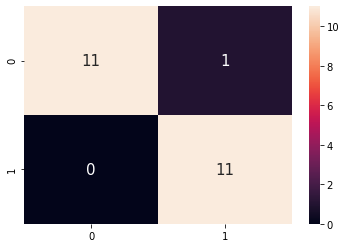

In [ ]:
df = pd.DataFrame(matriz, range(2), range(2))
sn.heatmap(df, annot=True, annot_kws={"size": 15})

A matriz de confusão acima indica o seguinte cenário:

* Das 12 instâncias pertencentes à classe _não doador_, o modelo classificou 11 de forma correta e apenas 1 como sendo da classe _doador_;

* Das 11 instâncias pertencentes à classe _doador_, o modelo classificou as 11 de forma correta

Seguindo para a sensibilidade e especificidade do modelo

$$\mathrm{Sensibilidade = \frac{VP}{VP + FN}} \ \ \  \mathrm{e} \ \ \ \mathrm{Especificidade = \frac{VN}{VN + FP}}$$ 

onde $\mathrm{VP}$ são as instâncias verdadeiras positivas, $\mathrm{FN}$ são as instâncias falsas negativas, $\mathrm{VN}$ são as instâncias verdadeiras negativas e $\mathrm{FP}$ são as instâncias falsas positivas. Logo, obtemos os seguintes resultados

$$\mathrm{Sensibilidade = \frac{VP}{VP + FN}} = \frac{11}{0 + 11} = 1 = 100\% \\ \mathrm{Especificidade = \frac{VN}{VN + FP}} = \frac{11}{11 + 1} = 0.9167 = 91,67\%$$ 

Comparando a acurácia, a sensibilidade e a especificidade do modelo na base de dados não normalizada, podemos concluir que os resultados estão muito consistentes, visto que as três métricas de avaliação variam muito pouco entre si

Os mesmos procedimentos foram feitos com a base de dados normalizada -- `hcv_dataset_norm`. Os resultados foram os seguintes:

* Acurácia: 99,99%
* Sensibilidade: 100%
* Especificidade: 100%

Comparando a acurácia, a sensibilidade e a especificidade do modelo na base de dados normalizada, podemos inferir que os resultados estão muito consistentes, visto que as três métricas de avaliação variam muito pouco entre si. Concluímos, portanto, que uso das bases com e sem normalização não provocou grandes mudanças nos resultados obtidos, exceto na especificidade (8,33 pontos percentuais de diferença entre a base com e sem normalização)

Agora, iremos classificar as 7 instâncias de **0s=suspect Blood Donor**

In [ ]:
hcv_dataset_suspect

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
533,0s=suspect Blood Donor,47,m,22.5,124.0,79.5,46.7,2.3,6.83,4.30,170.0,345.6,58.6
534,0s=suspect Blood Donor,48,m,24.9,116.9,49.2,24.3,4.9,3.44,5.25,29.0,83.0,47.8
535,0s=suspect Blood Donor,49,m,21.6,42.2,9.5,10.6,2.4,3.75,3.01,64.0,38.9,44.8
536,0s=suspect Blood Donor,55,m,47.3,106.0,208.8,130.6,0.8,14.80,8.08,76.0,71.6,78.3
537,0s=suspect Blood Donor,71,m,14.9,69.8,19.7,95.2,9.8,13.30,2.61,9.0,7.6,47.0
538,0s=suspect Blood Donor,74,m,20.3,84.0,22.8,43.0,5.7,4.91,3.19,52.0,218.3,47.8
539,0s=suspect Blood Donor,59,f,19.3,208.2,325.3,146.6,6.9,5.33,4.72,32.0,295.6,53.1


Convertendo **Sex** para valores numéricos

In [ ]:
hcv_dataset_suspect['Sex'] = to_number.fit_transform(hcv_dataset_suspect['Sex'])
hcv_dataset_suspect

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
533,0s=suspect Blood Donor,47,1,22.5,124.0,79.5,46.7,2.3,6.83,4.30,170.0,345.6,58.6
534,0s=suspect Blood Donor,48,1,24.9,116.9,49.2,24.3,4.9,3.44,5.25,29.0,83.0,47.8
535,0s=suspect Blood Donor,49,1,21.6,42.2,9.5,10.6,2.4,3.75,3.01,64.0,38.9,44.8
536,0s=suspect Blood Donor,55,1,47.3,106.0,208.8,130.6,0.8,14.80,8.08,76.0,71.6,78.3
537,0s=suspect Blood Donor,71,1,14.9,69.8,19.7,95.2,9.8,13.30,2.61,9.0,7.6,47.0
538,0s=suspect Blood Donor,74,1,20.3,84.0,22.8,43.0,5.7,4.91,3.19,52.0,218.3,47.8
539,0s=suspect Blood Donor,59,0,19.3,208.2,325.3,146.6,6.9,5.33,4.72,32.0,295.6,53.1


Separando os previsores

In [ ]:
previsores_suspect = hcv_dataset_suspect.iloc[:, 1:14]
previsores_suspect

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
533,47,1,22.5,124.0,79.5,46.7,2.3,6.83,4.30,170.0,345.6,58.6
534,48,1,24.9,116.9,49.2,24.3,4.9,3.44,5.25,29.0,83.0,47.8
535,49,1,21.6,42.2,9.5,10.6,2.4,3.75,3.01,64.0,38.9,44.8
536,55,1,47.3,106.0,208.8,130.6,0.8,14.80,8.08,76.0,71.6,78.3
537,71,1,14.9,69.8,19.7,95.2,9.8,13.30,2.61,9.0,7.6,47.0
538,74,1,20.3,84.0,22.8,43.0,5.7,4.91,3.19,52.0,218.3,47.8
539,59,0,19.3,208.2,325.3,146.6,6.9,5.33,4.72,32.0,295.6,53.1


Realizando as previsoes

In [ ]:
previsoes_suspect = model.predict(previsores_suspect)
previsoes_suspect = (previsoes_suspect > 0.5)
previsoes_suspect

array([[False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True]])

Podemos notar que o modelo classificou as 7 instâncias como 3 _doadores_ e 4 _não doadores_. Isso mostra uma resposta condizente, já que a classe não é definida para as instâncias em questão

### **Random Forest**
---

Primeiramente, iremos utilizar a base de dados pré-normalizada -- `hcv_dataset`

Importando a função `train_test_split` para realizarmos a subdivisão do dataset entre treinamento e teste

In [ ]:
from sklearn.model_selection import train_test_split

Criando as variáveis que irão receber os atributos previsores e a classe

In [ ]:
previsores = hcv_dataset.iloc[:, 1:14]
classe = hcv_dataset.iloc[:, 0]

Realizando a subdivisão do dataset entre treinamento e teste. O `test_size = 0.20` indica que 20% dos dados corresponderão à base de dados de teste, ou seja, 80% de todo o dataset será para treinamento do nosso classificador

In [ ]:
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores, classe,
                                                                                              random_state = 0, test_size = 0.20)

Importanto a biblioteca `sklearn` para desenvolvermos a aplicação envolvendo o Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

Criando o nosso classificador

In [ ]:
classifier = RandomForestClassifier(n_estimators = 30,
                                    criterion = 'entropy', random_state = 0)

Note que o critério utilizado será a **entropia**, para a escolha da melhor variável para compor o nó raiz

Treinando o classificador

In [ ]:
classifier.fit(previsores_treinamento, classe_treinamento)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

Agora, vamos realizar a predição do classificador

In [ ]:
previsoes = classifier.predict(previsores_teste)
previsoes = (previsoes > 0.5)
previsoes

array([ True,  True,  True, False, False,  True, False,  True, False,
        True,  True, False, False, False, False, False,  True,  True,
       False,  True,  True, False, False])

Importando as funções `confusion_matrix`, `accuracy_score` e `plot_confusion_matrix` e a bibliotecas `numpy`, `seaborn` e `matplotlib` para visualizarmos os resultados provenientes do modelo

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

Visualizando a acurácia do nosso modelo

In [ ]:
precisao = round(accuracy_score(classe_teste, previsoes), 2)
print('Acurácia:', precisao)

Acurácia: 1.0


Isto significa que o nosso classificador possui 100% de acerto na classificação das instâncias. É importante mencionar que o resultado pode ser alterado, uma vez que existem diversos outros parâmetros que podem ser manipulados, tal como a profundidade da árvore, dentre outros

In [ ]:
# Gerando a matriz de confusão do modelo
matriz = confusion_matrix(previsoes, classe_teste)

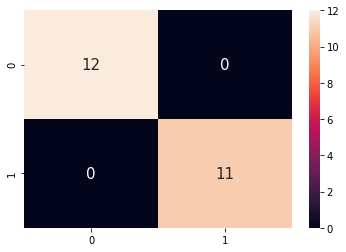

In [ ]:
df = pd.DataFrame(matriz, range(2), range(2))
sn.heatmap(df, annot=True, annot_kws={"size": 15})

A matriz de confusão acima indica o seguinte cenário:

* Das 12 instâncias pertencentes à classe _não doador_, o modelo classificou as 12 de forma correta;

* Das 11 instâncias pertencentes à classe _doador_, o modelo classificou as 11 de forma correta

Seguindo para a sensibilidade e especificidade do modelo

$$\mathrm{Sensibilidade = \frac{VP}{VP + FN}} \ \ \  \mathrm{e} \ \ \ \mathrm{Especificidade = \frac{VN}{VN + FP}}$$ 

onde $\mathrm{VP}$ são as instâncias verdadeiras positivas, $\mathrm{FN}$ são as instâncias falsas negativas, $\mathrm{VN}$ são as instâncias verdadeiras negativas e $\mathrm{FP}$ são as instâncias falsas positivas. Logo, obtemos os seguintes resultados

$$\mathrm{Sensibilidade = \frac{VP}{VP + FN}} = \frac{11}{0 + 11} = 1 = 100\%
\\ \mathrm{Especificidade = \frac{VN}{VN + FP}} = \frac{12}{12 + 0} = 1 = 100\%$$

Os mesmos procedimentos foram feitos com a base de dados normalizada -- `hcv_dataset_norm`. Os resultados foram os seguintes:

* Acurácia: 100%
* Sensibilidade: 100% 
* Especificidade: 100%

Comparando a acurácia, a sensibilidade e a especificidade do modelo na base de dados normalizada, podemos inferir que os resultados estão muito consistentes, visto que as três métricas de avaliação não variam entre si. Concluímos, portanto, que uso da base não normalizada e normalizada culminou em métricas de avaliação idênticas

Agora, iremos classificar as 7 instâncias de **0s=suspect Blood Donor**

In [ ]:
hcv_dataset_suspect

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
533,0s=suspect Blood Donor,47,1,22.5,124.0,79.5,46.7,2.3,6.83,4.30,170.0,345.6,58.6
534,0s=suspect Blood Donor,48,1,24.9,116.9,49.2,24.3,4.9,3.44,5.25,29.0,83.0,47.8
535,0s=suspect Blood Donor,49,1,21.6,42.2,9.5,10.6,2.4,3.75,3.01,64.0,38.9,44.8
536,0s=suspect Blood Donor,55,1,47.3,106.0,208.8,130.6,0.8,14.80,8.08,76.0,71.6,78.3
537,0s=suspect Blood Donor,71,1,14.9,69.8,19.7,95.2,9.8,13.30,2.61,9.0,7.6,47.0
538,0s=suspect Blood Donor,74,1,20.3,84.0,22.8,43.0,5.7,4.91,3.19,52.0,218.3,47.8
539,0s=suspect Blood Donor,59,0,19.3,208.2,325.3,146.6,6.9,5.33,4.72,32.0,295.6,53.1


Separando os previsores

In [ ]:
previsores_suspect = hcv_dataset_suspect.iloc[:, 1:14]
previsores_suspect

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
533,47,1,22.5,124.0,79.5,46.7,2.3,6.83,4.30,170.0,345.6,58.6
534,48,1,24.9,116.9,49.2,24.3,4.9,3.44,5.25,29.0,83.0,47.8
535,49,1,21.6,42.2,9.5,10.6,2.4,3.75,3.01,64.0,38.9,44.8
536,55,1,47.3,106.0,208.8,130.6,0.8,14.80,8.08,76.0,71.6,78.3
537,71,1,14.9,69.8,19.7,95.2,9.8,13.30,2.61,9.0,7.6,47.0
538,74,1,20.3,84.0,22.8,43.0,5.7,4.91,3.19,52.0,218.3,47.8
539,59,0,19.3,208.2,325.3,146.6,6.9,5.33,4.72,32.0,295.6,53.1


Realizando as previsoes

In [ ]:
previsoes_suspect = classifier.predict(previsores_suspect)
previsoes_suspect = (previsoes_suspect > 0.5)
previsoes_suspect

array([False,  True, False, False, False, False, False])

Podemos notar que o modelo classificou as 7 instâncias como 1 _doador_ e 6 _não doadores_, o que difere do modelo _Multilayer Perceptron_, que classificou as 7 instâncias como 3 _doadores_ e 4 _não doadores_. Isso mostra uma resposta condizente, já que a classe não é definida para as instâncias em questão, portanto poderíamos aguardar a classificação das instâncias em uma das duas classes existentes

## **Aprendizagem não supervisionada** 
---
As duas abordagens escolhidas foram _K-means_ e _Agrupamento hierárquico_. Primeiramenta, seguiremos para a realização do pré-processamento da base de dados, seguindo para a aplicação dos modelos mencionados

### **Pré-processamento dos dados**
---


Vamos importar a biblioteca `pandas`, para importar a base de dados e realizar o pré-processamento da mesma

In [ ]:
import pandas as pd

Relizando o upload do arquivo `.csv`

In [ ]:
# Carregamento da base de dados
wine_dataset = pd.read_csv("https://raw.githubusercontent.com/franklinthony/dataset/master/wine.csv", sep = ',')
wine_dataset

,class,alcohol,malic acid,ash,alcalinity of ash,magnesium,total phenols,flavanoids,nonflavanoid phenols,proanthocyanins,color intensity,hue,OD280/OD315 of diluted wines,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


Podemos notar que a base é composta por 13 atributos previsores e a classe. Como se trata de uma abordagem não supervisionada, precisamos remover a coluna **class**, que representa a classe a qual pertencem as instâncias. Para isso, iremos usar o método `pop`

In [ ]:
wine_dataset.pop('class')

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: class, Length: 178, dtype: int64

Verificando informações estatísticas (como valores máximo e mínimo, quartis, média e desvio padrão) sobre o dataset

In [ ]:
wine_dataset.describe()

,alcohol,malic acid,ash,alcalinity of ash,magnesium,total phenols,flavanoids,nonflavanoid phenols,proanthocyanins,color intensity,hue,OD280/OD315 of diluted wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


Podemos notar, dentre todos os atributos previsores, que **alcalinity of ash** e **magnesium** possuem média e desvio padrão muito distantes entre si, o que pode caracterizar a presença de _outliers_ em ambos os atributos

Vamos verificar a correlação entre os atributos, isto é, o quão eles estão relacionados

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt

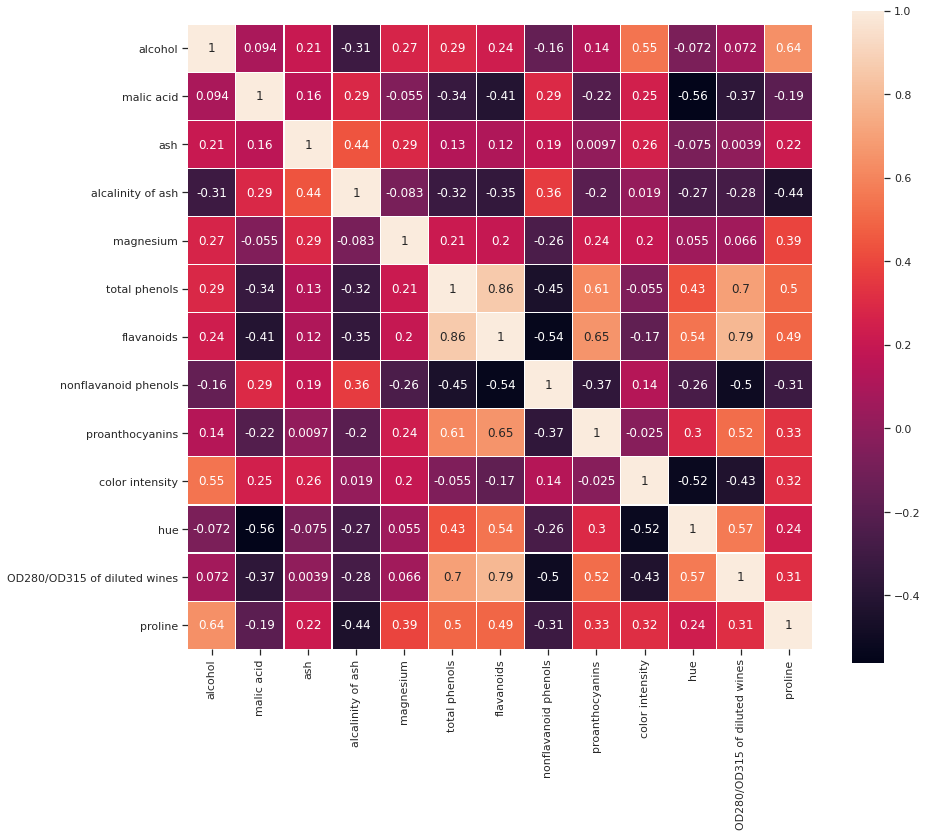

In [ ]:
sn.set(style='ticks', color_codes=True)
plt.figure(figsize=(14, 12))
sn.heatmap(wine_dataset.corr(), 
            linewidths=0.1, 
            square=True, 
            linecolor='white', 
            annot=True)
plt.show()

Agora, vamos verificar se há alguma ocorrência de valores nulos

In [ ]:
# Verificação de valores nulos
pd.isnull(wine_dataset).sum()

alcohol                         0
malic acid                      0
ash                             0
alcalinity of ash               0
magnesium                       0
total phenols                   0
flavanoids                      0
nonflavanoid phenols            0
proanthocyanins                 0
color intensity                 0
hue                             0
OD280/OD315 of diluted wines    0
proline                         0
dtype: int64

Podemos notar que a base não possui valores nulos em sua composição. Em seguida, vamos verificar a ocorrência de possíveis _outliers_, isto é, dados que se distanciam drasticamente dos demais dados da amostra. Para isso, iremos plotar um _boxplot_

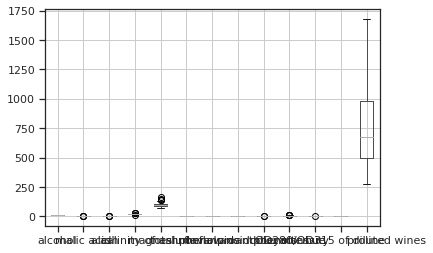

In [ ]:
# Plotagem do boxplot da coluna 'magnesium'
wine_dataset.boxplot()

Após uma verificação em toda a base de dados, foi constatado que as únicas colunas com presença significativa de _outliers_ foram a **alcalinity of ash** e a **magnesium*. Entretanto, iremos normalizar toda a base

Vamos utilizar o método `StandardScaler`, que leva em consideração a média e o desvio padrão dos atributos

In [ ]:
# Armazenando os valores da média e do desvio padrão
colunas_mean = wine_dataset.mean()
colunas_std = wine_dataset.std()
# Criação da base de dados normalizada
wine_dataset_norm = (wine_dataset - colunas_mean) / colunas_std
wine_dataset_norm

,alcohol,malic acid,ash,alcalinity of ash,magnesium,total phenols,flavanoids,nonflavanoid phenols,proanthocyanins,color intensity,hue,OD280/OD315 of diluted wines,proline
0,1.514341,-0.560668,0.231400,-1.166303,1.908522,0.806722,1.031908,-0.657708,1.221438,0.251009,0.361158,1.842721,1.010159
1,0.245597,-0.498009,-0.825667,-2.483841,0.018094,0.567048,0.731565,-0.818411,-0.543189,-0.292496,0.404908,1.110317,0.962526
2,0.196325,0.021172,1.106214,-0.267982,0.088110,0.806722,1.212114,-0.497005,2.129959,0.268263,0.317409,0.786369,1.391224
3,1.686791,-0.345835,0.486554,-0.806975,0.928300,2.484437,1.462399,-0.979113,1.029251,1.182732,-0.426341,1.180741,2.328007
4,0.294868,0.227053,1.835226,0.450674,1.278379,0.806722,0.661485,0.226158,0.400275,-0.318377,0.361158,0.448336,-0.037767
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.873810,2.966176,0.304301,0.300954,-0.331985,-0.982841,-1.420891,1.270726,-0.927563,1.139596,-1.388840,-1.227742,-0.021890
174,0.491955,1.408636,0.413653,1.049555,0.158126,-0.791103,-1.280731,0.547563,-0.316058,0.967055,-1.126341,-1.481267,0.009866
175,0.331822,1.739837,-0.388260,0.151234,1.418411,-1.126646,-1.340800,0.547563,-0.420888,2.217979,-1.607590,-1.481267,0.279786
176,0.208643,0.227053,0.012696,0.151234,1.418411,-1.030776,-1.350811,1.351077,-0.228701,1.829761,-1.563840,-1.396759,0.295664


Ao longo do desenvolvimento das aplicações, ambos os datasets (pré e pós-normalizado) serão utilizados, para comparação entre os resultados obtidos. Iremos, agora, para as aplicações

### **K-means**
---

Primeiramente, iremos utilizar a base de dados pré-normalizada -- `wine_dataset`

Importando as bibliotecas `matplotlib`, `numpy` e `KMeans` para realizarmos a construção do modelo e a visualização dos resultados

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

Criando a variável que irá receber os atributos

In [ ]:
atributos = wine_dataset.iloc[:, 0:13]
atributos

,alcohol,malic acid,ash,alcalinity of ash,magnesium,total phenols,flavanoids,nonflavanoid phenols,proanthocyanins,color intensity,hue,OD280/OD315 of diluted wines,proline
0,14.23,1.71,2.43,15.6,0.783951,2.80,3.06,0.28,2.29,5.64,1.04,3.92,0.633929
1,13.20,1.78,2.14,11.2,0.617284,2.65,2.76,0.26,1.28,4.38,1.05,3.40,0.625000
2,13.16,2.36,2.67,18.6,0.623457,2.80,3.24,0.30,2.81,5.68,1.03,3.17,0.705357
3,14.37,1.95,2.50,16.8,0.697531,3.85,3.49,0.24,2.18,7.80,0.86,3.45,0.880952
4,13.24,2.59,2.87,21.0,0.728395,2.80,2.69,0.39,1.82,4.32,1.04,2.93,0.437500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,0.586420,1.68,0.61,0.52,1.06,7.70,0.64,1.74,0.440476
174,13.40,3.91,2.48,23.0,0.629630,1.80,0.75,0.43,1.41,7.30,0.70,1.56,0.446429
175,13.27,4.28,2.26,20.0,0.740741,1.59,0.69,0.43,1.35,10.20,0.59,1.56,0.497024
176,13.17,2.59,2.37,20.0,0.740741,1.65,0.68,0.53,1.46,9.30,0.60,1.62,0.500000


Conferindo o número de _clusters_ que serão usados no algoritmo

In [ ]:
# Recebe a distância dos pontos até o centroide
wcss = []

for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, random_state = 0)
    # Treinamento
    kmeans.fit(atributos)
    # Acréscimo da distância à variável 'wcss'
    wcss.append(kmeans.inertia_)

Text(0, 0.5, 'WCSS')

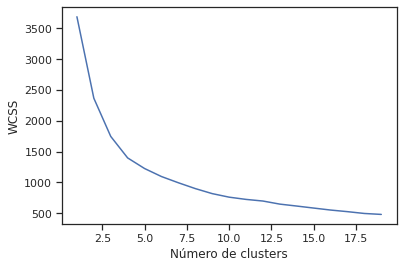

In [ ]:
plt.plot(range(1, 20), wcss)
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')

Iremos escolher 3 _clusters_, uma vez que a variação da distância entre 2 e 5 _clusters_ é muito pequena em comparação com os valores anteriores

Criando uma instância do `KMeans` com 3 _clusters_ e `random_state = 0`, para garantir a replicação dos resultados por terceiros

In [ ]:
kmeans = KMeans(n_clusters = 3, random_state = 0)
previsoes = kmeans.fit_predict(atributos)
previsoes

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2,
       1, 1, 0, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

Convertendo os atributos para um array, a fim de visualizarmos as instâncias no gráfico

In [ ]:
atributos = np.array(atributos)
atributos

array([[14.23      ,  1.71      ,  2.43      , ...,  1.04      ,
         3.92      ,  0.63392857],
       [13.2       ,  1.78      ,  2.14      , ...,  1.05      ,
         3.4       ,  0.625     ],
       [13.16      ,  2.36      ,  2.67      , ...,  1.03      ,
         3.17      ,  0.70535714],
       ...,
       [13.27      ,  4.28      ,  2.26      , ...,  0.59      ,
         1.56      ,  0.49702381],
       [13.17      ,  2.59      ,  2.37      , ...,  0.6       ,
         1.62      ,  0.5       ],
       [14.13      ,  4.1       ,  2.74      , ...,  0.61      ,
         1.6       ,  0.33333333]])

Plotagem dos _clusters_ em 2D, a partir das colunas **alcohol** e **malic acid**

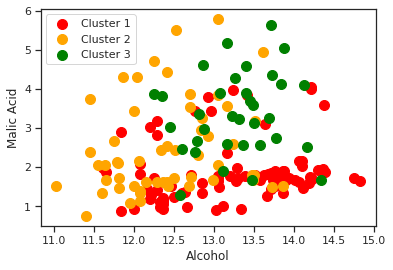

In [ ]:
plt.scatter(atributos[previsoes == 0, 0], atributos[previsoes == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(atributos[previsoes == 1, 0], atributos[previsoes == 1, 1], s = 100, c = 'orange', label = 'Cluster 2')
plt.scatter(atributos[previsoes == 2, 0], atributos[previsoes == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')
plt.legend()

Agora, vamos avaliar o modelo a partir da métrica `silhouette_score`

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
silhueta = silhouette_score(atributos, previsoes)
silhueta

0.3360903354475261

Antes, vamos à uma breve descrição dos possíveis resultados de silhueta

|                s(i)               | Descrição |
|:------------------------------------:|:---------:|
|                  0,71 -- 1,00                 |    Uma estrutura forte foi encontrada       |
|                  0,51 -- 0,70               |       Uma estrutura razoável foi encontrada    |
|            0,26 -- 0,50      |    A estrutura é fraca e pode ser superficial. O uso de outro método é aconselhável       |
|           <= 0,25   |  Nenhuma estrutura substancial foi encontrada         |

Podemos notar uma silhueta de 0.3361, o que indica que a estrutura encontrada pelo modelo é fraca e pode representar um modelo superficial dos dados. Sendo assim, é recomendável a utilização de outros métodos de agrupamento para o banco de dados em questão

Os mesmos procedimentos foram feitos com a base de dados normalizada -- `wine_dataset_norm`. O resultado foi o seguinte:

* Silhueta: 0,2848

Comparando a silhueta, podemos inferir que o resultado do modelo que usou a base normalizada obteve o mesmo intervalo de silhueta da base não normalizada, o que indica que a estrutura de agrupamento é fraca e pode representar um modelo superficial dos dados

### **Agrupamento hierárquico**
---

Primeiramente, iremos utilizar a base de dados pré-normalizada -- `wine_dataset`

Importando as bibliotecas `matplotlib`, `numpy` e `KMeans`; e as funções `dendrogram` e `linkage` para realizarmos a construção do modelo e a visualização dos resultados

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

Criando a variável que irá receber os atributos

In [ ]:
atributos = wine_dataset.iloc[:, 0:13]
atributos

,alcohol,malic acid,ash,alcalinity of ash,magnesium,total phenols,flavanoids,nonflavanoid phenols,proanthocyanins,color intensity,hue,OD280/OD315 of diluted wines,proline
0,14.23,1.71,2.43,15.6,0.783951,2.80,3.06,0.28,2.29,5.64,1.04,3.92,0.633929
1,13.20,1.78,2.14,11.2,0.617284,2.65,2.76,0.26,1.28,4.38,1.05,3.40,0.625000
2,13.16,2.36,2.67,18.6,0.623457,2.80,3.24,0.30,2.81,5.68,1.03,3.17,0.705357
3,14.37,1.95,2.50,16.8,0.697531,3.85,3.49,0.24,2.18,7.80,0.86,3.45,0.880952
4,13.24,2.59,2.87,21.0,0.728395,2.80,2.69,0.39,1.82,4.32,1.04,2.93,0.437500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,0.586420,1.68,0.61,0.52,1.06,7.70,0.64,1.74,0.440476
174,13.40,3.91,2.48,23.0,0.629630,1.80,0.75,0.43,1.41,7.30,0.70,1.56,0.446429
175,13.27,4.28,2.26,20.0,0.740741,1.59,0.69,0.43,1.35,10.20,0.59,1.56,0.497024
176,13.17,2.59,2.37,20.0,0.740741,1.65,0.68,0.53,1.46,9.30,0.60,1.62,0.500000


Conferindo o número de _clusters_ que serão usados no algoritmo

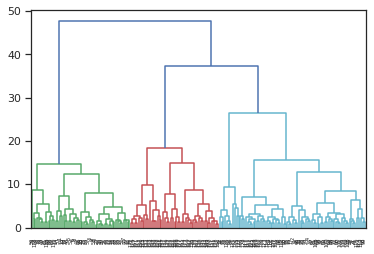

In [ ]:
dendrograma = dendrogram(linkage(atributos, method = 'ward'))

Podemos notar que a linha vertical mais à direita do gráfico possui apenas três cruzamentos, número este que podemos adotar como sendo a quantidade de _clusters_

Criando o modelo de agrupamento com 3 _clusters_

In [ ]:
# Criando o modelo de agrupamento
agruphier = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean',
                                    linkage = 'ward')
# Conferindo as previsões
previsoes = agruphier.fit_predict(atributos)
previsoes

array([1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

Convertendo os atributos para um array, a fim de visualizarmos as instâncias no gráfico

In [ ]:
atributos = np.array(atributos)
atributos

array([[14.23      ,  1.71      ,  2.43      , ...,  1.04      ,
         3.92      ,  0.63392857],
       [13.2       ,  1.78      ,  2.14      , ...,  1.05      ,
         3.4       ,  0.625     ],
       [13.16      ,  2.36      ,  2.67      , ...,  1.03      ,
         3.17      ,  0.70535714],
       ...,
       [13.27      ,  4.28      ,  2.26      , ...,  0.59      ,
         1.56      ,  0.49702381],
       [13.17      ,  2.59      ,  2.37      , ...,  0.6       ,
         1.62      ,  0.5       ],
       [14.13      ,  4.1       ,  2.74      , ...,  0.61      ,
         1.6       ,  0.33333333]])

Plotagem dos _clusters_ em 2D, a partir das colunas **alcohol** e **malic acid**

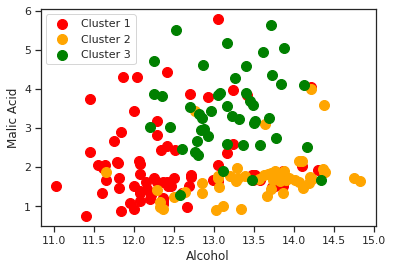

In [ ]:
plt.scatter(atributos[previsoes == 0, 0], atributos[previsoes == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(atributos[previsoes == 1, 0], atributos[previsoes == 1, 1], s = 100, c = 'orange', label = 'Cluster 2')
plt.scatter(atributos[previsoes == 2, 0], atributos[previsoes == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')
plt.legend()

Agora, vamos avaliar o modelo a partir da métrica `silhouette_score`

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
silhueta = silhouette_score(atributos, previsoes)
silhueta

0.2908992328173456

Comparando a silhueta, podemos inferir que o resultado do modelo que usou a base normalizada obteve... 

Antes, vamos à uma breve descrição dos possíveis resultados de silhueta

|                s(i)               | Descrição |
|:------------------------------------:|:---------:|
|                  0,71 -- 1,00                 |    Uma estrutura forte foi encontrada       |
|                  0,51 -- 0,70               |       Uma estrutura razoável foi encontrada    |
|            0,26 -- 0,50      |    A estrutura é fraca e pode ser superficial. O uso de outro método é aconselhável       |
|           <= 0,25   |  Nenhuma estrutura substancial foi encontrada         |

Podemos notar uma silhueta de 0.2909, o que indica que a estrutura encontrada pelo modelo é fraca e pode representar um modelo superficial dos dados. Sendo assim, é recomendável a utilização de outros métodos de agrupamento para o banco de dados em questão

Os mesmos procedimentos foram feitos com a base de dados normalizada -- `wine_dataset_norm`. O resultado foi o seguinte:

* Silhueta: 0,2774

Comparando a silhueta, podemos inferir que o resultado do modelo que usou a base normalizada obteve o mesmo intervalo de silhueta da base não normalizada, o que indica que a estrutura de agrupamento é fraca e pode representar um modelo superficial dos dados. Portanto, tanto o _K_means_ quanto o _Agrupamento hierárquico_ não obtiveram representações consistentes dos dados, o que conduz à realização de outros métodos para essa base de dados